In [1]:
include("../mps.jl")
using .MatrixProductState
using LinearAlgebra

using Plots

In [2]:
r_c = 14
r_r = 16

psi_complex = rand(ComplexF32, (2 for _=1:r_c)...)
psi_complex /= sqrt(abs(dot(psi_complex, psi_complex)))

psi_real = rand(Float64, (2 for _=1:r_r)...)
psi_real /= norm(psi_real);

In [3]:
function mps_and_contract(psi, bond_dim)
    A_mps = contract_mps(mps(psi, bond_dim))
    return abs(dot(A_mps, psi))
end

mps_and_contract (generic function with 1 method)

Float32[0.8672847, 0.8688647, 0.8708887, 0.8741868, 0.87718934, 0.8811585, 0.8910647, 0.9326638, 0.9865126, 1.0000004, 1.0000004, 1.0000004, 1.0000004]

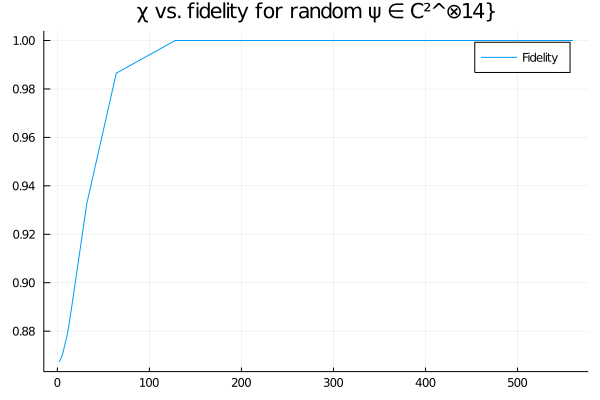

In [4]:
bond_dims = [2, 4, 6, 8, 10, 12, 16, 32, 64, 128, 256, 512, 560]
complex_fidelities = map(chi->mps_and_contract(psi_complex, chi),
                         bond_dims)
print(complex_fidelities)
plot(bond_dims,
     complex_fidelities,
     title = "χ vs. fidelity for random ψ ∈ C²^⊗14}",
     label = "Fidelity")

[0.8668045273064817, 0.8671967333502144, 0.8679665020735232, 0.8689419206685547, 0.8700586060922515, 0.8711786006527754, 0.8745277034725096, 0.8922072926012279, 0.9330861272204086, 0.9865426816406202, 0.9999999999999912, 0.9999999999999912, 0.9999999999999912]

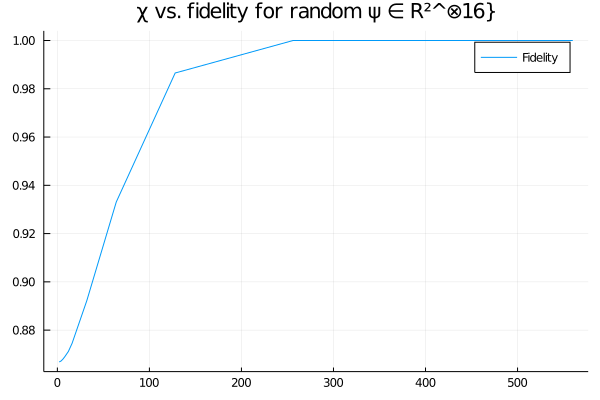

In [5]:
real_fidelities = map(chi->mps_and_contract(psi_real, chi),
                      bond_dims)
print(real_fidelities)
plot(bond_dims,
     real_fidelities,
     title = "χ vs. fidelity for random ψ ∈ R²^⊗16}",
     label = "Fidelity")